In [1]:
import numpy as np

from ase import Atoms, units
from ase.calculators.lj import LennardJones
from ase.optimize import BFGS
from ase.constraints import FixedPlane
from ase.visualize import view

from math import sqrt, exp
import matplotlib.pyplot as plt
from numpy.random import default_rng

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ShuffleSplit

# a random number generator
rng = default_rng(19884)

# Week 2: Network Architecture and weight Optimization

## 2.1 Task 1: Optimizer

#### Load datasets

In [2]:
with open('2d_200.npy', 'rb') as f:
    X2d_200 = np.load(f)
    y2d_200 = np.load(f)

In [3]:
with open('2d_2000.npy', 'rb') as f:
    X2d_2000 = np.load(f)
    y2d_2000 = np.load(f)

In [4]:
with open('3d_10.npy', 'rb') as f:
    X3d_10 = np.load(f)
    y3d_10 = np.load(f)

In [5]:
with open('3d_800.npy', 'rb') as f:
    X3d_800 = np.load(f)
    y3d_800 = np.load(f)

In [6]:
#define test and train size by shuffle and spliting
rs = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# spliting into train and test sets  for data set for X3d_800 (3D and T=800)
for train_ind , test_ind in rs.split(X3d_800):
    train_ind = train_ind # train_ind: indexes in data set X3d_800
    test_ind = test_ind   # test_ind: indexes in data set X3d_800
    
# define MLPregressors (two with adam and two with lbfgs solver)
nn_adam_1 = MLPRegressor(hidden_layer_sizes=(10,10), solver='adam', random_state=1, warm_start=False, max_iter=2000)
nn_adam_2 = MLPRegressor(hidden_layer_sizes=(10,10), solver='adam', random_state=2, warm_start=False, max_iter=2000)

nn_ibfg_1 = MLPRegressor(hidden_layer_sizes=(10,10), solver='lbfgs', random_state=1, warm_start=False, max_iter=2000)
nn_ibfg_2 = MLPRegressor(hidden_layer_sizes=(10,10), solver='lbfgs', random_state=2, warm_start=False, max_iter=2000)

#fit regressors to training data
nn_adam_1.fit(X3d_800[train_ind], y3d_800[train_ind])
nn_ibfg_1.fit(X3d_800[train_ind], y3d_800[train_ind])

nn_adam_2.fit(X3d_800[train_ind], y3d_800[train_ind])
nn_ibfg_2.fit(X3d_800[train_ind], y3d_800[train_ind])

# prediction for entire data
y_adam_1_pred = nn_adam_1.predict(X3d_800)
y_adam_2_pred = nn_adam_2.predict(X3d_800)

y_ibfg_1_pred = nn_ibfg_1.predict(X3d_800)
y_ibfg_2_pred = nn_ibfg_2.predict(X3d_800)

In [8]:
#evaluation for test dataset
r2_score_adam_1 = r2_score(y3d_800[test_ind], y_adam_1_pred[test_ind]) 
r2_score_adam_2 = r2_score(y3d_800[test_ind], y_adam_2_pred[test_ind]) 
r2_score_ibfg_1 = r2_score(y3d_800[test_ind], y_ibfg_1_pred[test_ind]) 
r2_score_ibfg_2 = r2_score(y3d_800[test_ind], y_ibfg_2_pred[test_ind])
#--------
mse_adam_1_train = mean_squared_error(y3d_800[train_ind], y_adam_1_pred[train_ind])
mse_adam_1_test = mean_squared_error( y3d_800[test_ind], y_adam_1_pred[test_ind])
mae_adam_1_train = mean_absolute_error(y3d_800[train_ind], y_adam_1_pred[train_ind])
mae_adam_1_test = mean_absolute_error(y3d_800[test_ind], y_adam_1_pred[test_ind])
#--------
mse_adam_2_train = mean_squared_error(y3d_800[train_ind], y_adam_2_pred[train_ind])
mse_adam_2_test = mean_squared_error(y3d_800[test_ind], y_adam_2_pred[test_ind])
mae_adam_2_train = mean_absolute_error(y3d_800[train_ind], y_adam_2_pred[train_ind])
mae_adam_2_test = mean_absolute_error(y3d_800[test_ind], y_adam_2_pred[test_ind])
#--------------
mse_ibfg_1_train = mean_squared_error(y3d_800[train_ind], y_ibfg_1_pred[train_ind])
mse_ibfg_1_test = mean_squared_error(y3d_800[test_ind], y_ibfg_1_pred[test_ind])
mae_ibfg_1_train = mean_absolute_error(y3d_800[train_ind], y_ibfg_1_pred[train_ind])
mae_ibfg_1_test = mean_absolute_error(y3d_800[test_ind], y_ibfg_1_pred[test_ind])
#--------------------
mse_ibfg_2_train = mean_squared_error(y3d_800[train_ind], y_ibfg_2_pred[train_ind])
mse_ibfg_2_test = mean_squared_error(y3d_800[test_ind], y_ibfg_2_pred[test_ind])
mae_ibfg_2_train = mean_absolute_error(y3d_800[train_ind], y_ibfg_2_pred[train_ind])
mae_ibfg_2_test = mean_absolute_error(y3d_800[test_ind], y_ibfg_2_pred[test_ind])
# number of iterations : nn_adam_1.n_iter_

| Solver | MSE Train | MAE Train | MSE Test | MAE Test | R$^2$ score |num of iteration
| :- | -: | :-: | -: | :-: | :-: | :-: |
| Adam Solver 1| 0.045 | 0.152 | 0.050 | 0.160 | 0.948 | 1930
| lbfgs Solver 1| 0.007 | 0.063 | 0.006 | 0.059 | 0.994| 481
| Adam Solver 2| 0.075 | 0.180 | 0.073 | 0.174 | 0.925 | 1156
| lbfgs Solver 2| 0.007 | 0.065 | 0.006 | 0.061 | 0.994 | 252


**Our results shows lbfgs solver perform good for both cases of different weights ininitation having less MSE and MAE**

## 2.2 Task 2: Hidden layer nodes

### To explore "How MSE depends on number of hidden layers and respective nodes"

In [10]:
#define test and train size by shuffle and spliting
rs = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# spliting into train and test sets  for data set for X3d_800 (3D and T=800)
for train_ind , test_ind in rs.split(X3d_800):
    train_ind = train_ind # train_ind: indexes in data set X3d_800
    test_ind = test_ind   # test_ind: indexes in data set X3d_800

In [11]:
def mse_nn(X, y, num_h_layer, num_h_node, train, test, solver='lbfgs', activation='logistic'):
    """
    Compute MSE for a MLP regressor with fitting and prediction for a given number 
    of hidden nodes of layer (here same value for each layer)
    
    Parameter
    ----------
    X : Data set i/p values
    y : Data set labels
    num_h_node : int
                 Number of hidden nodes for each layer: here same value for each layer
    train: 1d nd-array 
           Train index after shuffle and split
    test : 1-d nd array
           Test index after shuffle and split
    solver : solvers for MLP regressor as defined in scikit-learn library
    activation : Activation function of MLP regressor as defined in scikit-learn library
    
    Return
    ------
    mse_train_ : MSE for training data
    mse_test_ : MSE for test data
    """
    
    hidden_layer_size = tuple([num_h_node] * num_h_layer)
    
    nn = MLPRegressor(hidden_layer_sizes=hidden_layer_size, solver=solver, activation=activation, random_state=1, warm_start=False, max_iter=2000)
    nn.fit(X[train], y[train])
    y_pred = nn.predict(X)
    mse_train_ = mean_squared_error(y[train], y_pred[train])
    mse_test_ = mean_squared_error(y[test], y_pred[test])
    return mse_train_, mse_test_
    

#### evaluation

In [12]:
# Compute MSE's for all combinations for NN with 1 hidden layer
node_series = 10 * np.arange(1, 11, 1)
mse_train = []   # list of Train MSE's
mse_test = []    # list of Test MSE's 
for node_ in node_series:
    m, n = mse_nn(X3d_800, y3d_800, num_h_layer=1, num_h_node=node_, train=train_ind, test=test_ind)
    mse_train.append(m)
    mse_test.append(n)
    
# explore for NN with 2 hidden layer for all combinations 
node_series_ = np.arange(1, 16, 1)
mse_train_2NN = []   # list of Train MSE's
mse_test_2NN = []    # list of Test MSE's 
for node_ in node_series_:
    m, n = mse_nn(X3d_800, y3d_800, num_h_layer=2, num_h_node=node_, train=train_ind, test=test_ind)
    mse_train_2NN.append(m)
    mse_test_2NN.append(n)

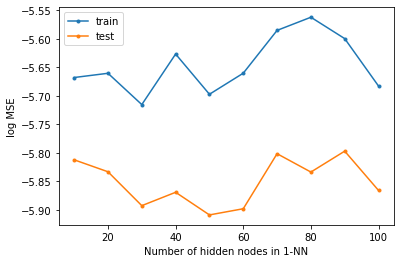

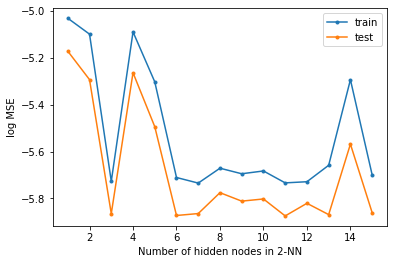

In [13]:
plt.plot(node_series, np.log(mse_train), label='train', marker='.')
plt.plot(node_series, np.log(mse_test), label='test',  marker='.')
plt.xlabel('Number of hidden nodes in 1-NN')
plt.ylabel('log MSE')
plt.legend()
plt.show()
plt.plot(node_series_, np.log(mse_train_2NN), label='train', marker='.')
plt.plot(node_series_, np.log(mse_test_2NN), label='test',  marker='.')
plt.xlabel('Number of hidden nodes in 2-NN')
plt.ylabel('log MSE')
plt.legend()
plt.show()

| Solver | NN type |Optimial number of hidden nodes with Minimum MSE Test | Minimum MSE Test  
| :- | -: | :-: | -: | 
| lbfgs solver with Logistic | 1-NN | 50 | 0.0027 
| lbfgs solver with Logistic | 2-NN | 11 | 0.0028 

Here 1-NN with 5 nodes is giving lesser MSE with respect to 2-NN but we see there are number of nodes in 2-NN architecture for which MSE is in same range and generalises well with a wide number of hidden nodes.  2-NN architecture will be more flexible to other inputs and perform well if the number of data increases.  
I think 2-NN architecture with 11 number of nodes should be selected.

## 2.2 Task 3 Activation Function    

In [14]:
# explore for NN with 1 hidden layer
node_series = 10 * np.arange(1, 11, 1)
mse_train = []
mse_test = []
for node_ in node_series:
    m, n = mse_nn(X3d_800, y3d_800, num_h_layer=1, num_h_node=node_, train=train_ind, test=test_ind, activation='relu')
    mse_train.append(m)
    mse_test.append(n)
    
# explore for NN with 2 hidden layer
node_series_ = np.arange(1, 16, 1)
mse_train_2NN = []
mse_test_2NN = []
for node_ in node_series_:
    m, n = mse_nn(X3d_800, y3d_800, num_h_layer=2, num_h_node=node_, train=train_ind, test=test_ind, activation='relu')
    mse_train_2NN.append(m)
    mse_test_2NN.append(n)

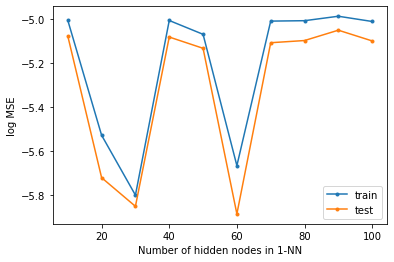

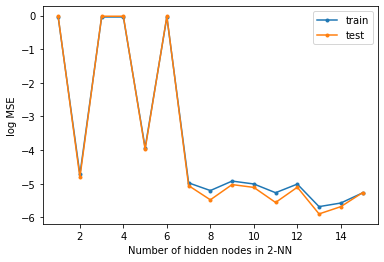

In [15]:
plt.plot(node_series, np.log(mse_train), label='train', marker='.')
plt.plot(node_series, np.log(mse_test), label='test',  marker='.')
plt.xlabel('Number of hidden nodes in 1-NN')
plt.ylabel('log MSE')
plt.legend()
plt.show()

plt.plot(node_series_, np.log(mse_train_2NN), label='train', marker='.')
plt.plot(node_series_, np.log(mse_test_2NN), label='test',  marker='.')
plt.xlabel('Number of hidden nodes in 2-NN')
plt.ylabel('log MSE')
plt.legend()
plt.show()

| Solver | NN type |Optimal number of hidden nodes (Minimum MSE Test) | Minimum MSE Test  
| :- | -: | :-: | -: | 
| lbfgs solver with relu | 1-NN | 60 | 0.00278 
| lbfgs solver with relu | 2-NN | 13 | 0.00275 

**Comparison of logistic and relu activation function**   
The gap between traing and test samples is very less in relu activation function but it shows very less gap for even small number of nodes as well which can be doubtful. On the other-hand, the gap between test and training in case of  "logistic function" is consistent.  
Therefore, I think that 2-NN (lbfgs solver with logistic) should be prefered. 

# 3. Learning curve

## 3.1 Size of training dataset

In [16]:
num_samples = np.array([30, 50, 100, 200, 300, 400, 500, 600, 700, 800])

In [17]:
def evaluate(n_samples, X , y, train, test):
    """
    Define MLP Regressor, fits & computes MSE, R-Square score
    
    Parameter
    ---------
    n_samples : The number of samples in training set
    X : Data set i/p values
    y : Data set labels
    train: 1d nd-array 
           Train index after shuffle and split
    test : 1-d nd array
           Test index after shuffle and split
    
    Return
    ------
    mse_train : MSE for training data
    R2_train : R-square score of training data
    mse_test : MSE for test data
    R2_test : R-square score of test data
    
    """
    trn_sample_ind = np.random.choice(train, size=(n_samples,), replace=True, p=None)
    X_ = X[trn_sample_ind]
    y_ = y[trn_sample_ind]
    
    nn = MLPRegressor(hidden_layer_sizes=(10,10), solver='lbfgs', activation='logistic', random_state=1, warm_start=False, max_iter=10000)
    nn.fit(X_, y_)
    y_p = nn.predict(X)

    mse_test = mean_squared_error(y[test], y_p[test])
    R2_test= r2_score(y[test], y_p[test]) 

    mse_train = mean_squared_error(y[trn_sample_ind], y_p[trn_sample_ind])
    R2_train= r2_score(y[trn_sample_ind], y_p[trn_sample_ind])
    
    return mse_train, R2_train, mse_test, R2_test  

In [18]:
def evaluate_trn_size(num_samples_, X, y, train, test):
    """
    Evalute MSE's and R-square scores for all training and test set with different sizes
    
    Parameter
    ----------
    num_samples_: 1d nd-array
                  list of number of samples in training set
    X : Data set i/p values
    y : Data set labels
    train: 1d nd-array 
           Train index after shuffle and split
    test : 1-d nd array
           Test index after shuffle and split
    
    Return
    ------
    mse_train : list of MSE's for training data
    R2_train : lis of R-square scores of training data
    mse_test : list of MSE's for test data
    R2_test : list of R-square scores of test data
    
    """
    mse_trn, r2_trn, mse_tst, r2_tst = [], [], [], []
    for num in num_samples_:
        a, b, c, d = evaluate(num, X , y, train, test)
        mse_trn.append(a)
        r2_trn.append(b)
        mse_tst.append(c)
        r2_tst.append(d)
    return mse_trn, r2_trn, mse_tst, r2_tst

In [19]:
#evalution
d31_mse_trn, d31_r2_trn, d31_mse_tst, d31_r2_tst = evaluate_trn_size(num_samples, X3d_800, y3d_800, train_ind, test_ind)
d32_mse_trn, d32_r2_trn, d32_mse_tst, d32_r2_tst = evaluate_trn_size(num_samples, X3d_10, y3d_10, train_ind, test_ind)
d21_mse_trn, d21_r2_trn, d21_mse_tst, d21_r2_tst = evaluate_trn_size(num_samples, X2d_200, y2d_200, train_ind, test_ind)
d22_mse_trn, d22_r2_trn, d22_mse_tst, d22_r2_tst = evaluate_trn_size(num_samples, X2d_2000, y2d_2000, train_ind, test_ind)

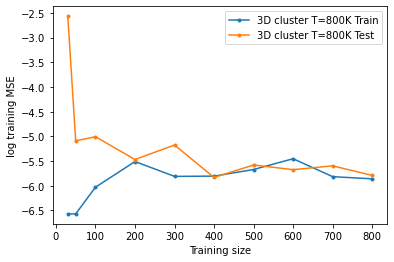

In [20]:
plt.plot(num_samples, np.log(d31_mse_trn), label='3D cluster T=800K Train', marker='.')
plt.plot(num_samples, np.log(d31_mse_tst), label='3D cluster T=800K Test', marker='.')
plt.xlabel('Training size')
plt.ylabel('log training MSE')
plt.legend()
plt.show()

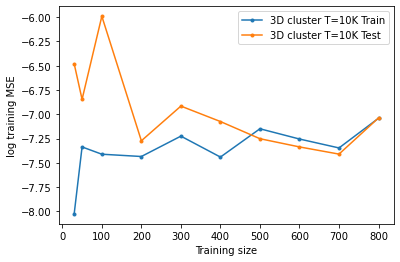

In [21]:
plt.plot(num_samples, np.log(d32_mse_trn), label='3D cluster T=10K Train', marker='.')
plt.plot(num_samples, np.log(d32_mse_tst), label='3D cluster T=10K Test', marker='.')
plt.xlabel('Training size')
plt.ylabel('log training MSE')
plt.legend()
plt.show()

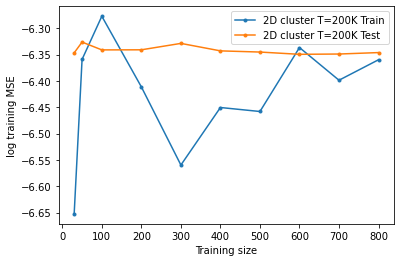

In [22]:
plt.plot(num_samples, np.log(d21_mse_trn), label='2D cluster T=200K Train', marker='.')
plt.plot(num_samples, np.log(d21_mse_tst), label='2D cluster T=200K Test', marker='.')
plt.xlabel('Training size')
plt.ylabel('log training MSE')
plt.legend()
plt.show()

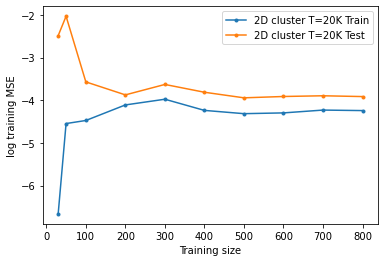

In [23]:
plt.plot(num_samples, np.log(d22_mse_trn), label='2D cluster T=20K Train', marker='.')
plt.plot(num_samples, np.log(d22_mse_tst), label='2D cluster T=20K Test', marker='.')
plt.xlabel('Training size')
plt.ylabel('log training MSE')
plt.legend()
plt.show()

All plots above shows that we should have at least 200 number of training samples from where difference between the training and test is not wide.  